**Date**: October 30, 2019 <br>
**Authors**: Zoe Liu, Ciera Martinez <br>
**Purpose**: To find the counts of species not represented across all orthologous regions. Reason species are not represented in a given region include:
* The motif is too short
* The sequence ended
* The score is below the threshold of 7

**Background**: The data is taken from the file "all_data_bcd_2019_10_01_after_QC.csv", which is the dataset after quality control was performed. <br>
**Methodology**: Import the data from csv. Iterating through all elements with the same region, extract species that have TFBS == yes into a list and compare the list to a list of all species in the region. Find the species included in the original list but not in the TFBS list. These are the species that are not represented in the orthologous region by our threshold of score == 7. Use this method across every region and tally the species when they are not represented. 

## Experiment

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
import pandas as pd
#This is just a quick check to make sure my code works. Orth and Original are taken from region VT15159. The dataset I took it
#from is the same as the one we will be using. I confirmed that the output of this cell is consistent with my manual check 
#of the species not contained in the original list.

orth = pd.read_csv("data/orth.csv") 
original = pd.read_csv("data/original.csv") 
[i for i in original["species"] if i not in list(orth["species"])]

['MEMB002F', 'MEMB004B', 'MEMB004E', 'MEMB005D', 'MEMB006A', 'MEMB006C']

In [10]:
data = pd.read_csv("data/all_data_bcd_2019_10_01_after_QC.csv")
data.head()

,strand,align_position,score,region,enhancer_func,species,raw_position,raw_seq,before_seq,after_seq,TFBS_called
0,positive,972,-8.157841,VT14010,0,MEMB002A,376,CAACCT,AATTGC,AGCAAT,no
1,positive,972,-0.436742,VT14010,0,MEMB002B,375,CAATCT,AATTGC,AGCAAT,no
2,positive,972,-8.157841,VT14010,0,MEMB002C,376,CAACCT,AATTGC,AGCAAT,no
3,positive,972,7.351161,VT14010,0,MEMB002D,376,TAATCT,AATTGC,AGCAAT,yes
4,positive,972,3.891729,VT14010,0,MEMB002E,376,TAATCG,AATAGC,AGCTAT,no


In [11]:
#The number of unique regions. We have to iterate through all 2264 of them in order to find the tallies of non-represented
#species
unique_regions = data["region"].unique()
len(unique_regions)

2264

In [12]:
not_included = {} #This dictionary will contain the tally of non-represented species
for region in unique_regions:
    temp = data[data["region"] == region] #filter the data to get elements in that specific region
    temp_tfbs = temp[temp["TFBS_called"] == "yes"] #filter temp to get rows corresponding to TFBS
    orth = temp_tfbs["species"].unique() #get unique species from TFBS == yes rows
    original = temp["species"].unique() #get unique species from the entire region

#if a species is in the region but not represented in the orthologous region, increase its tally by one
    for i in original:
        if i not in orth:
            if i not in not_included:
                not_included[i] = 0
            else:
                not_included[i] += 1

In [13]:
#sort the dictionary in increasing order to find the most and least represented species
sorted(not_included.items(), key=lambda kv: kv[1])

[('MEMB006B', 405),
 ('MEMB003B', 410),
 ('MEMB007C', 416),
 ('MEMB006A', 420),
 ('MEMB002D', 427),
 ('MEMB002E', 431),
 ('MEMB003D', 433),
 ('MEMB003F', 433),
 ('MEMB004B', 434),
 ('MEMB005D', 434),
 ('MEMB005B', 437),
 ('MEMB003A', 438),
 ('MEMB007D', 440),
 ('dkik', 440),
 ('MEMB006C', 443),
 ('MEMB002B', 445),
 ('MEMB004E', 445),
 ('MEMB008C', 456),
 ('MEMB002C', 457),
 ('MEMB007B', 460),
 ('MEMB004A', 464),
 ('MEMB002A', 466),
 ('MEMB003C', 473),
 ('MEMB002F', 478)]

In [37]:
#create dataframe to plot graph
data_df = pd.DataFrame([not_included])
data_df = data_df.transpose()
data_df = data_df.sort_values(0)

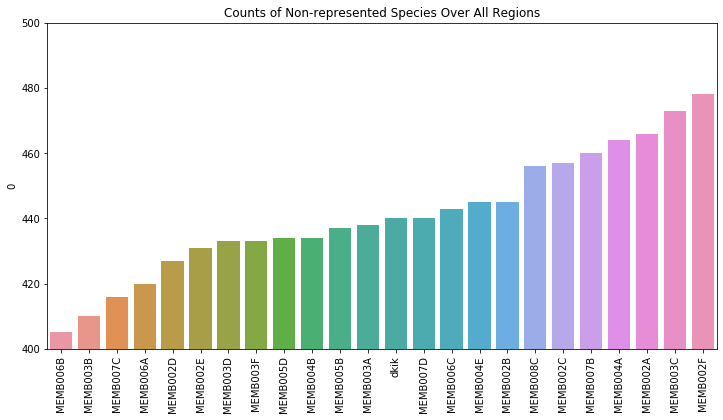

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6)) #create a figure that is 12 x 6
ax = sns.barplot(x=data_df.index, y=data_df[0], data=data_df, order=data_df.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.ylim(400, 500)
plt.title("Counts of Non-represented Species Over All Regions")
plt.show()

In [21]:
print("Total tally of non-representation: ", sum(not_included.values()))
print("Percentage of total database: ", sum(not_included.values()) / len(data))
avg = sum(not_included.values()) / len(not_included)
print("Average count of non-representation: ", avg)
print("Average percentage of non-represented regions: ", avg / len(unique_regions))

Total tally of non-representation:  10585
Percentage of total database:  0.0264524480697335
Average count of non-representation:  441.0416666666667
Average percentage of non-represented regions:  0.1948063898704358


**Conclusion**: We can observe that all species are pretty much evenly non-represented, with a range of 73. The least represented species is MEMB002F with a tally of 478 (which corresponds to 21% of all regions) and the most represented species is MEMB006B with a tally of 405 (which corresponds to 17% of all regions).  The total number of times a species is not represented is 10585, which is roughly 2% of our entire database. This is pretty low, and an indicator that our scoring system is working well. However on average, species are not represented in roughly 19% of regions. Can this number be lower?